In [242]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
import io

In [305]:
nf = int(input("Ingrese el número de filas: "))
nc = int(input("Ingrese el número de columnas: "))
matrix = np.zeros((nf, nc, 3))

In [306]:
def branch_12(iv, jv, colores, ax):
    for j in range(colores.shape[1]):
        i = iv - abs(j-jv)
        if i >= 0:
            colores[i, j, :] = [0.5, 0.5, 1]
    ax.imshow(colores)

def branch_34(iv, jv, colores, ax):
    for j in range(colores.shape[1]):
        i = iv + abs(j-jv)
        if i < colores.shape[0]:
            colores[i, j, :] = [1, 0.5, 1]
    ax.imshow(colores)

def branch_23(iv, jv, colores, ax):
    for i in range(colores.shape[0]):
        j = jv - abs(i-iv)
        if j >= 0:
            colores[i, j, :] = [1, 0.5, 0.5]
    ax.imshow(colores)

def branch_14(iv, jv, colores, ax):
    for i in range(colores.shape[0]):
        j = jv + abs(i-iv)
        if j < colores.shape[1]:
            colores[i, j, :] = [1, 0.5, 0]
    ax.imshow(colores)

In [307]:
def graphic_(t, m):
    fig, ax = plt.subplots()

    # Crear una copia de la matriz de colores
    colores_copia = m.copy() / 255.0

    # Diagonal Principal
    start_row = t[0]
    start_col = t[1]
    while start_row < colores_copia.shape[0] and start_col < colores_copia.shape[1]:
        colores_copia[start_row, start_col, :] = [1, 0.5, 1]
        start_row += 1
        start_col += 1

    # Diagonal Secundaria
    start_row = t[0]
    start_col = t[1]
    while start_row < colores_copia.shape[0] and start_col >= 0:
        colores_copia[start_row, start_col, :] = [0.5, 0.5, 1]
        start_row += 1
        start_col -= 1

    # Resaltar la fila y columna
    fila_resaltada = t[0]
    colores_copia[fila_resaltada, :, :] = [1, 0.5, 0]
    columna_resaltada = t[1]
    colores_copia[:, columna_resaltada, :] = [1, 0.5, 0.5]

    # Mostrar el gráfico
    im = ax.imshow(colores_copia)
    plt.show()


Tupla:  (48, 37)


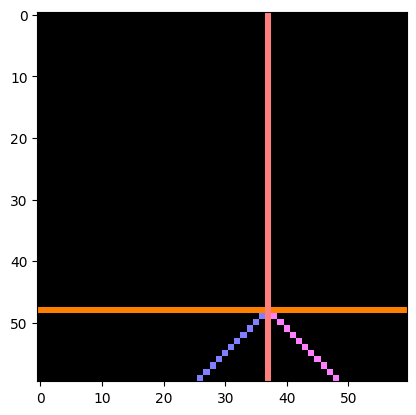

In [308]:
t = (np.random.randint(0, nf), np.random.randint(0, nc))
print("Tupla: ", t)
graphic_(t, matrix)
matrix = np.zeros((nf, nc, 3))

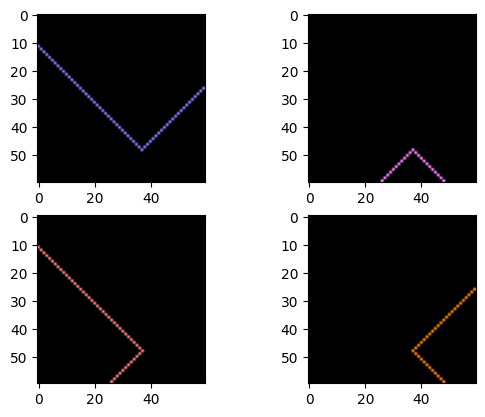

In [309]:
matrix = np.zeros((nf, nc, 3))
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2)

branch_12(t[0], t[1], matrix.copy(), ax1)
branch_34(t[0], t[1], matrix.copy(), ax2)
branch_23(t[0], t[1], matrix.copy(), ax3)
branch_14(t[0], t[1], matrix.copy(), ax4)

fig.savefig('branches.png', dpi=300, bbox_inches='tight')
plt.show()

TENSORES CON IMÁGENES

In [310]:
url = "https://png.pngtree.com/element_our/20190603/ourmid/pngtree-big-fist-gesture-illustration-image_1434619.jpg"

def obtain_image(url):
    # Obtener la imagen de la URL
    response = requests.get(url)
    image_bytes = io.BytesIO(response.content)
    # Abrir la imagen con PIL
    image = Image.open(image_bytes)
    # Convertir la imagen a un arreglo NumPy
    image_array = np.array(image)
    return image, image_array

img, img_array = obtain_image(url)
print("Dimensiones de la imagen: ", img_array.shape)

Dimensiones de la imagen:  (360, 360, 3)


In [311]:
#Crear una tupla con valores aleatorios de la imagen
t = (np.random.randint(0, img_array.shape[0]), np.random.randint(0, img_array.shape[1]))
print(t)
img, img_array = obtain_image(url)

(173, 105)


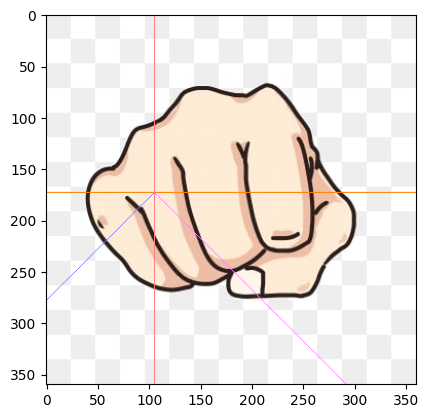

In [312]:
graphic_(t, img_array.copy())

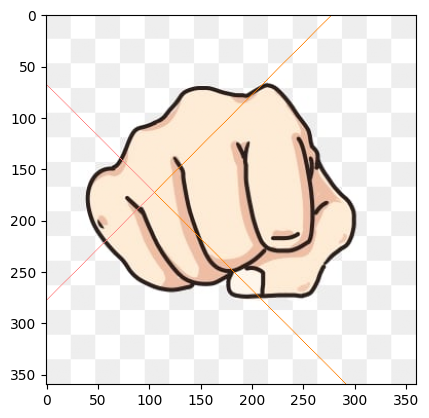

In [313]:
fig, ax5 = plt.subplots()
colores = img_array.copy() / 255.0  # Crear una copia normalizada de la imagen original
branch_12(t[0], t[1], colores, ax5)
branch_34(t[0], t[1], colores, ax5)
branch_23(t[0], t[1], colores, ax5)
branch_14(t[0], t[1], colores, ax5)

plt.show()

Figuras Triangulo rectangulo, Rectangulo, Rombo, Triangulo isoceles

In [317]:
def cuadrado(i,j,matrix):
  matrix[i, j, :] = [1, 0.5, 0.5]
  if (i==matrix.shape[0]-1 and j==matrix.shape[1]-1):
    return matrix
  elif i==matrix.shape[0]-1:
    print("i: ", i, "j: ", j)
    cuadrado(0,j+1,matrix)
  else:
    print("i: ", i, "j: ", j)
    cuadrado(i+1,j,matrix)

cuadrado(t[0],t[1],img_array.copy())

(360, 360, 3)
i:  173 j:  105
(360, 360, 3)
i:  174 j:  105
(360, 360, 3)
i:  175 j:  105
(360, 360, 3)
i:  176 j:  105
(360, 360, 3)
i:  177 j:  105
(360, 360, 3)
i:  178 j:  105
(360, 360, 3)
i:  179 j:  105
(360, 360, 3)
i:  180 j:  105
(360, 360, 3)
i:  181 j:  105
(360, 360, 3)
i:  182 j:  105
(360, 360, 3)
i:  183 j:  105
(360, 360, 3)
i:  184 j:  105
(360, 360, 3)
i:  185 j:  105
(360, 360, 3)
i:  186 j:  105
(360, 360, 3)
i:  187 j:  105
(360, 360, 3)
i:  188 j:  105
(360, 360, 3)
i:  189 j:  105
(360, 360, 3)
i:  190 j:  105
(360, 360, 3)
i:  191 j:  105
(360, 360, 3)
i:  192 j:  105
(360, 360, 3)
i:  193 j:  105
(360, 360, 3)
i:  194 j:  105
(360, 360, 3)
i:  195 j:  105
(360, 360, 3)
i:  196 j:  105
(360, 360, 3)
i:  197 j:  105
(360, 360, 3)
i:  198 j:  105
(360, 360, 3)
i:  199 j:  105
(360, 360, 3)
i:  200 j:  105
(360, 360, 3)
i:  201 j:  105
(360, 360, 3)
i:  202 j:  105
(360, 360, 3)
i:  203 j:  105
(360, 360, 3)
i:  204 j:  105
(360, 360, 3)
i:  205 j:  105
(360, 360,

RecursionError: maximum recursion depth exceeded while calling a Python object